In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yaml
import os
import sys
sys.path.append(os.path.abspath("../../src/"))
from tools import PDFs
import matplotlib.pyplot as plt
import numpy as npA
import lhapdf
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [5]:
a= """1.020900E-008   1.246930E-008   1.523000E-008   1.860190E-008   2.272050E-008   2.775080E-008   3.389490E-008   4.139940E-008   5.056530E-008   6.176060E-008   7.543460E-008   9.213600E-008   1.125350E-007   1.374510E-007   1.678830E-007   2.050520E-007   2.504520E-007   3.059020E-007   3.736300E-007   4.563530E-007   5.573900E-007   6.807980E-007   8.315290E-007   1.015630E-006   1.240500E-006   1.515140E-006   1.850600E-006   2.260330E-006   2.760770E-006   3.372020E-006   4.118590E-006   5.030460E-006   6.144210E-006   7.504560E-006   9.166090E-006   1.119550E-005   1.367420E-005   1.670170E-005   2.039950E-005   2.491600E-005   3.043250E-005   3.717030E-005   4.539990E-005   5.545160E-005   6.772870E-005   8.272410E-005   1.010390E-004   1.234100E-004   1.507330E-004   1.841060E-004   2.248670E-004   2.746540E-004   3.354630E-004   4.097350E-004   5.004510E-004   6.112530E-004   7.465860E-004   9.118820E-004   1.113780E-003   1.360370E-003   1.661560E-003   2.029430E-003   2.478750E-003   3.027550E-003   3.697860E-003   4.516580E-003   5.516560E-003   6.737950E-003   8.229750E-003   1.005180E-002   1.227730E-002   1.499560E-002   1.831560E-002   2.237080E-002   2.732370E-002   3.337330E-002   4.076220E-002   4.978710E-002   6.081010E-002   7.427360E-002   9.071800E-002   1.108030E-001   1.353350E-001   1.446650E-001   1.546380E-001   1.652990E-001   1.766940E-001   1.888760E-001   2.018970E-001   2.158150E-001   2.306930E-001   2.465970E-001   2.635970E-001   2.817690E-001   3.011940E-001   3.219580E-001   3.441540E-001   3.678790E-001   3.932410E-001   4.203500E-001   4.493290E-001   4.803050E-001   5.134170E-001   5.488120E-001   5.611440E-001   5.737530E-001   5.866460E-001   5.998290E-001   6.133070E-001   6.270890E-001   6.411800E-001   6.555880E-001   6.703200E-001   6.853830E-001   7.007840E-001   7.165310E-001   7.326320E-001   7.490950E-001   7.659280E-001   7.831390E-001   8.007370E-001   8.187310E-001   8.248180E-001   8.309500E-001   8.371280E-001   8.433520E-001   8.496230E-001   8.559400E-001   8.623030E-001   8.687150E-001   8.751730E-001   8.816800E-001   8.882350E-001   8.948390E-001   9.014920E-001   9.081950E-001   9.149470E-001   9.217500E-001   9.286030E-001   9.355070E-001   9.424620E-001   9.494700E-001   9.565290E-001   9.636400E-001   9.708050E-001   9.780230E-001   9.852940E-001   9.926200E-001   1.000000E+000"""
al = []
for i in a.split("  ") : 
  print(i, end=" , ")
  al.append(float(i))

len(al)

1.020900E-008 ,  1.246930E-008 ,  1.523000E-008 ,  1.860190E-008 ,  2.272050E-008 ,  2.775080E-008 ,  3.389490E-008 ,  4.139940E-008 ,  5.056530E-008 ,  6.176060E-008 ,  7.543460E-008 ,  9.213600E-008 ,  1.125350E-007 ,  1.374510E-007 ,  1.678830E-007 ,  2.050520E-007 ,  2.504520E-007 ,  3.059020E-007 ,  3.736300E-007 ,  4.563530E-007 ,  5.573900E-007 ,  6.807980E-007 ,  8.315290E-007 ,  1.015630E-006 ,  1.240500E-006 ,  1.515140E-006 ,  1.850600E-006 ,  2.260330E-006 ,  2.760770E-006 ,  3.372020E-006 ,  4.118590E-006 ,  5.030460E-006 ,  6.144210E-006 ,  7.504560E-006 ,  9.166090E-006 ,  1.119550E-005 ,  1.367420E-005 ,  1.670170E-005 ,  2.039950E-005 ,  2.491600E-005 ,  3.043250E-005 ,  3.717030E-005 ,  4.539990E-005 ,  5.545160E-005 ,  6.772870E-005 ,  8.272410E-005 ,  1.010390E-004 ,  1.234100E-004 ,  1.507330E-004 ,  1.841060E-004 ,  2.248670E-004 ,  2.746540E-004 ,  3.354630E-004 ,  4.097350E-004 ,  5.004510E-004 ,  6.112530E-004 ,  7.465860E-004 ,  9.118820E-004 ,  1.113780E-003 

149

In [6]:
b=np.array( [  1.0000E-8, 1.020900E-008 ,  1.246930E-008 ,  1.523000E-008 ,  1.860190E-008 ,  2.272050E-008 ,  2.775080E-008 ,  3.389490E-008 ,  4.139940E-008 ,  5.056530E-008 ,  6.176060E-008 ,  7.543460E-008 ,  9.213600E-008 ,  1.125350E-007 ,  1.374510E-007 ,  1.678830E-007 ,  2.050520E-007 ,  2.504520E-007 ,  3.059020E-007 ,  3.736300E-007 ,  4.563530E-007 ,  5.573900E-007 ,  6.807980E-007 ,  8.315290E-007 ,  1.015630E-006 ,  1.240500E-006 ,  1.515140E-006 ,  1.850600E-006 ,  2.260330E-006 ,  2.760770E-006 ,  3.372020E-006 ,  4.118590E-006 ,  5.030460E-006 ,  6.144210E-006 ,  7.504560E-006 ,  9.166090E-006 ,  1.119550E-005 ,  1.367420E-005 ,  1.670170E-005 ,  2.039950E-005 ,  2.491600E-005 ,  3.043250E-005 ,  3.717030E-005 ,  4.539990E-005 ,  5.545160E-005 ,  6.772870E-005 ,  8.272410E-005 ,  1.010390E-004 ,  1.234100E-004 ,  1.507330E-004 ,  1.841060E-004 ,  2.248670E-004 ,  2.746540E-004 ,  3.354630E-004 ,  4.097350E-004 ,  5.004510E-004 ,  6.112530E-004 ,  7.465860E-004 ,  9.118820E-004 ,  1.113780E-003 ,  1.360370E-003 ,  1.661560E-003 ,  2.029430E-003 ,  2.478750E-003 ,  3.027550E-003 ,  3.697860E-003 ,  4.516580E-003 ,  5.516560E-003 ,  6.737950E-003 ,  8.229750E-003 ,  1.005180E-002 ,  1.227730E-002 ,  1.499560E-002 ,  1.831560E-002 ,  2.237080E-002 ,  2.732370E-002 ,  3.337330E-002 ,  4.076220E-002 ,  4.978710E-002 ,  6.081010E-002 ,  7.427360E-002 ,  9.071800E-002 ,  1.108030E-001 ,  1.353350E-001 ,  1.446650E-001 ,  1.546380E-001 ,  1.652990E-001 ,  1.766940E-001 ,  1.888760E-001 ,  2.018970E-001 ,  2.158150E-001 ,  2.306930E-001 ,  2.465970E-001 ,  2.635970E-001 ,  2.817690E-001 ,  3.011940E-001 ,  3.219580E-001 ,  3.441540E-001 ,  3.678790E-001 ,  3.932410E-001 ,  4.203500E-001 ,  4.493290E-001 ,  4.803050E-001 ,  5.134170E-001 ,  5.488120E-001 ,  5.611440E-001 ,  5.737530E-001 ,  5.866460E-001 ,  5.998290E-001 ,  6.133070E-001 ,  6.270890E-001 ,  6.411800E-001 ,  6.555880E-001 ,  6.703200E-001 ,  6.853830E-001 ,  7.007840E-001 ,  7.165310E-001 ,  7.326320E-001 ,  7.490950E-001 ,  7.659280E-001 ,  7.831390E-001 ,  8.007370E-001 ,  8.187310E-001 ,  8.248180E-001 ,  8.309500E-001 ,  8.371280E-001 ,  8.433520E-001 ,  8.496230E-001 ,  8.559400E-001 ,  8.623030E-001 ,  8.687150E-001 ,  8.751730E-001 ,  8.816800E-001 ,  8.882350E-001 ,  8.948390E-001 ,  9.014920E-001 ,  9.081950E-001 ,  9.149470E-001 ,  9.217500E-001 ,  9.286030E-001 ,  9.355070E-001 ,  9.424620E-001 ,  9.494700E-001 ,  9.565290E-001 ,  9.636400E-001 ,  9.708050E-001 ,  9.780230E-001 ,  9.852940E-001 ,  9.926200E-001 ,  1.000000E+000 , 
])
print(b**2)

[1.00000000e-16 1.04223681e-16 1.55483442e-16 2.31952900e-16
 3.46030684e-16 5.16221120e-16 7.70106901e-16 1.14886425e-15
 1.71391032e-15 2.55684956e-15 3.81437171e-15 5.69037888e-15
 8.48904250e-15 1.26641262e-14 1.88927774e-14 2.81847017e-14
 4.20463227e-14 6.27262043e-14 9.35760336e-14 1.39599377e-13
 2.08258061e-13 3.10683612e-13 4.63485917e-13 6.91440478e-13
 1.03150430e-12 1.53884025e-12 2.29564922e-12 3.42472036e-12
 5.10909171e-12 7.62185099e-12 1.13705189e-11 1.69627836e-11
 2.53055278e-11 3.77513165e-11 5.63184208e-11 8.40172059e-11
 1.25339220e-10 1.86983746e-10 2.78946783e-10 4.16139600e-10
 6.20807056e-10 9.26137056e-10 1.38163120e-09 2.06115092e-09
 3.07487994e-09 4.58717680e-09 6.84327672e-09 1.02088795e-08
 1.52300281e-08 2.27204373e-08 3.38950192e-08 5.05651677e-08
 7.54348197e-08 1.12535424e-07 1.67882770e-07 2.50451203e-07
 3.73630230e-07 5.57390655e-07 8.31528782e-07 1.24050589e-06
 1.85060654e-06 2.76078163e-06 4.11858612e-06 6.14420156e-06
 9.16605900e-06 1.367416

In [7]:
ub_pt = [75, 95, 115, 150, 400] 
lb_pt = [55, 75, 95,  115, 150]
files = ["RSIG_1a.yaml", "RSIG_1b.yaml", "RSIG_1c.yaml", "RSIG_1d.yaml", "RSIG_1e.yaml"]
#files = ["SIG_pp_a.yaml", "SIG_pp_b.yaml", "SIG_pp_c.yaml", "SIG_pp_d.yaml", "SIG_pp_e.yaml"]
#files = ["SIG_pPb_4a.yaml", "SIG_pPb_4b.yaml", "SIG_pPb_4c.yaml", "SIG_pPb_4d.yaml", "SIG_pPb_4e.yaml"]

central = []
stat = []
syst = []
lb = []
ub =[]
ptlb = []
ptub = []
for i, file in zip(range(len(files)), files) : 
    stream = open('CMSdijet/' +file, 'r') 
    data = yaml.safe_load(stream)
    for a in data["dependent_variables"][0]["values"] : 
        central.append (a["value"])
        stat.append (a["errors"][0]["symerror"])
        syst.append (a["errors"][1]["symerror"])


    for a in data["independent_variables"][0]["values"] : 
        ub.append(a["high"])
        lb.append(a["low"])
        ptub.append(ub_pt[i])
        ptlb.append(lb_pt[i])

assert(len(central)==len(stat))

for i in range(len(central)) : 
    #print(i)
    j=i
    if (i>51) : 
        j=i+1
    #print ("[", j,",", ptlb[i], ",", ptub[i], ",", lb[i], ",", ub[i], ",", central[i], ",", stat[i], ",", syst[i], "],")

In [8]:
def getDF (mode=0):
    ub_pt = [75, 95, 115, 150, 400] 
    lb_pt = [55, 75, 95,  115, 150]
    if mode==0 : 
        files = ["RSIG_1a.yaml", "RSIG_1b.yaml", "RSIG_1c.yaml", "RSIG_1d.yaml", "RSIG_1e.yaml"]
    elif mode==1 : 
        files = ["SIG_pp_a.yaml", "SIG_pp_b.yaml", "SIG_pp_c.yaml", "SIG_pp_d.yaml", "SIG_pp_e.yaml"]
    else : 
        files = ["SIG_pPb_4a.yaml", "SIG_pPb_4b.yaml", "SIG_pPb_4c.yaml", "SIG_pPb_4d.yaml", "SIG_pPb_4e.yaml"]

    data_df = []
    for i, file in zip(range(len(files)), files) : 
        central = []
        stat = []
        syst = []
        lb = []
        ub =[]
        ptlb = []
        ptub = []

        stream = open('CMSdijet/' +file, 'r') 
        data = yaml.safe_load(stream)
        for a in data["dependent_variables"][0]["values"] : 
            central.append (a["value"])
            stat.append (a["errors"][0]["symerror"])
            syst.append (a["errors"][1]["symerror"])


        for a in data["independent_variables"][0]["values"] : 
            ub.append(a["high"])
            lb.append(a["low"])
            ptub.append(ub_pt[i])
            ptlb.append(lb_pt[i])

        df = pd.DataFrame({"PT_lb": ptlb, "PT_ub" : ptub, "eta_lb" : lb, "eta_ub": ub, "central" : central, "stat" : stat, "syst" : syst})
        data_df.append(df)
        #display(df)

    return data_df

def get_fullDF (df, theoOr, mode, label="theory_cteq") : 
    for i in range(0, 5) : 
        if (mode!=0) : 
            if (i==0) : 
                theo = theoOr[:18]
            elif (i==1) : 
                theo = theoOr[18:35]
            elif i==2: 
                theo = theoOr[35:52]
            elif i==3 :
                theo = theoOr[52:69]
            elif i==4 : 
                theo = theoOr[69:85]
            else : 
                pass
        else : 
            if (i==0) : 
                theo = theoOr[:18]
            elif (i==1) : 
                theo = theoOr[18:35]
            elif i==2: 
                theo = theoOr[35:52]
            elif i==3 :
                theo = theoOr[52:68]
            elif i==4 : 
                theo = theoOr[68:84]
            else : 
                pass
        df_th = pd.DataFrame({label : theo})
        df[i] = pd.concat([df[i], df_th], axis=1)
    
    return df
        


In [9]:
theo_rsig = [  
    0.731532, 0.81446, 0.867203, 0.909943, 0.951668, 0.996726, 1.03474, 1.06278, 1.07781, 1.07806, 1.06564, 1.04254, 1.01141, 0.974768, 0.93738, 0.903584, 0.867411, 0.83444, 0.760255, 0.812808, 0.854317, 0.898829, 0.942546, 0.985897, 1.0246, 1.05389, 1.06958, 1.07119,
     1.05993, 1.03687, 1.0048, 0.967353, 0.930674, 0.889553, 0.850269, 0.724048, 0.773867, 0.817328, 0.860125, 0.903649, 0.947571, 0.990277, 1.02765, 1.05452, 1.06777, 1.06734, 1.05292, 1.0267, 0.991889, 0.954462, 0.909773, 0.864588, 0.741044, 0.785113, 0.827893, 0.86995, 0.913305, 
     0.95657, 0.998073, 1.03297, 1.0574, 1.06826, 1.06452, 1.04592, 1.0158, 0.979161, 0.931745, 0.881707, 0.701095, 0.747744, 0.789706, 0.829538, 0.868921, 0.909629, 0.95146, 0.992013, 1.02904, 1.05728, 1.07274, 1.07155, 1.0529, 1.0211, 0.97241, 0.910226
]
theo_pp_cteq = [
    0.000962752, 0.0178511, 0.0587371, 0.0972317, 0.139317, 0.18523, 0.22649, 0.261936, 0.292969, 0.312392, 0.324194, 0.320461, 0.307299, 0.279498, 0.23883, 0.190767, 0.111713, 0.026533, 0.00761722, 0.0408588, 0.0797569, 0.128171, 0.177053, 0.225263, 0.266504, 0.300963, 0.326043, 0.335384, 0.334301, 0.318022, 0.289351, 0.24815, 0.197146, 0.111026, 0.022668, 0.00262701, 0.0240345, 0.0606338, 0.110798, 0.168141, 0.222813, 0.269454, 0.309339, 0.336499, 0.350335, 0.348648, 0.331821, 0.301907, 0.256512, 0.200578,
    0.108155, 0.018645, 0.000522837, 0.0107893, 0.0396405, 0.089195, 0.152006, 0.216811, 0.273893, 0.32069, 0.352301, 0.368798, 0.368525, 0.34932, 0.314484, 0.264661, 0.201133, 0.100112, 0.0137186, 0.00138336, 0.0128389, 0.0479109, 0.111047, 0.191159, 0.273334, 0.34289, 0.392785, 0.418703, 0.41824, 0.391801, 0.341163, 0.268178, 0.185304, 0.0727005, 0.00505728,
]

theo_pp_CJ15 = [ 
    0.000827345, 0.0163053, 0.0545787, 0.0914711, 0.133255, 0.180421, 0.224327, 0.263553, 0.297866, 0.318609, 0.329345, 0.325708, 0.313816, 0.284664, 0.241129, 0.18982, 0.108385, 0.0249447, 0.00675187, 0.0375411, 0.0753345, 0.123018, 0.172136, 0.22177, 0.26607, 0.304378, 0.331835, 0.343268, 0.342311, 0.324054, 0.29302, 0.248355, 0.194753, 0.107743, 0.0214032, 0.00225705, 0.0219077, 0.0571682, 0.106521, 0.163495, 0.21865, 0.267328, 0.309957, 0.341721, 0.360942, 0.359835, 0.337472, 0.302858, 0.254888, 0.197459, 
0.105207, 0.0176554, 0.00043518, 0.00970024, 0.0371073, 0.0856622, 0.147954, 0.212649, 0.270226, 0.319414, 0.358108, 0.380344, 0.380011, 0.355179, 0.313667, 0.261268, 0.197797, 0.0974925, 0.0129365, 0.00120107, 0.011856, 0.0457252, 0.108035, 0.187058, 0.269172, 0.34321, 0.398053, 0.426641, 0.426281, 0.397044, 0.3415, 0.264001, 0.181584, 0.0706215, 0.00469508,
]

theo_pp_CJ15RW = [  
    0.000745964, 0.0147474, 0.0513717, 0.0890201, 0.132737, 0.182019, 0.226783, 0.265579, 0.298677, 0.318221, 0.328258, 0.324353, 0.31287, 0.284884, 0.24273, 0.192169, 0.109822, 0.0246286, 0.0060134, 0.0339643, 0.0702716, 0.1189, 0.170625, 0.222882, 0.268562, 0.3069, 0.333796, 0.344715, 0.343664, 0.325732, 0.29533, 0.250995, 0.196719, 0.107131, 0.0201984, 0.00203232, 0.0195329, 0.0519332, 0.100011, 0.158741, 0.217424, 0.269294, 0.313769, 0.346178, 0.365417, 0.364296, 0.341873, 0.306759, 0.257395, 0.197465, 
0.102015, 0.0161229, 0.000399237, 0.00870172, 0.0332421, 0.0785356, 0.140244, 0.208119, 0.270469, 0.32397, 0.365366, 0.388747, 0.388503, 0.362519, 0.318398, 0.262068, 0.194364, 0.0919086, 0.0116114, 0.00110739, 0.0107052, 0.0412416, 0.0994224, 0.177548, 0.263788, 0.345607, 0.408402, 0.441864, 0.441493, 0.407494, 0.344025, 0.258875, 0.172538, 0.0646592, 0.00423357,
]

theo_pp_CT18 =  [ 
    0.000862293, 0.0168818, 0.0568445, 0.0950105, 0.136971, 0.183357, 0.225467, 0.262191, 0.29452, 0.314974, 0.327356, 0.323577, 0.309813, 0.280915, 0.23911, 0.190169, 0.110766, 0.0260881, 0.00695569, 0.0384692, 0.0766057, 0.124702, 0.173915, 0.223241, 0.266268, 0.302967, 0.330034, 0.3405, 0.339452, 0.322024, 0.291375, 0.248105, 0.195737, 0.109231, 0.0219384, 0.00233554, 0.0220983, 0.0572414, 0.106663, 0.164138, 0.220024, 0.268834, 0.311536, 0.341269, 0.356686, 0.355002, 0.336649, 0.304266, 0.256186, 0.198433, 
0.105618, 0.0177326, 0.000454854, 0.00970666, 0.0367335, 0.0847793, 0.14735, 0.213346, 0.272837, 0.322899, 0.357557, 0.375858, 0.375678, 0.354698, 0.316853, 0.263996, 0.19837, 0.0969073, 0.0127911, 0.0012133, 0.0116231, 0.0446833, 0.106289, 0.18683, 0.271508, 0.344722, 0.397989, 0.425848, 0.425339, 0.397113, 0.343124, 0.266621, 0.18137, 0.0692718, 0.00459127,
  ]

theo_pp_CT18rw = [ 
    0.000797369, 0.0158991, 0.054368, 0.0921522, 0.134513, 0.181994, 0.225383, 0.263142, 0.296221, 0.317058, 0.329611, 0.325735, 0.311746, 0.282444, 0.240085, 0.190501, 0.110126, 0.0254504, 0.00647376, 0.0363418, 0.0731908, 0.12091, 0.170905, 0.221811, 0.266853, 0.305264, 0.333527, 0.34456, 0.343547, 0.32548, 0.293663, 0.248901, 0.194977, 0.107345, 0.0210518, 0.00215926, 0.0207151, 0.0542541, 0.102405, 0.159923, 0.217324, 0.268647, 0.313921, 0.345765, 0.362306, 0.360706, 0.341249, 0.306787, 0.256333, 0.196471, 
0.102772, 0.016855, 0.0004153, 0.00905212, 0.0346317, 0.0808729, 0.14247, 0.209402, 0.271583, 0.32508, 0.362793, 0.38296, 0.382779, 0.36005, 0.31927, 0.263017, 0.194991, 0.093492, 0.0120941, 0.00111954, 0.0109223, 0.0424497, 0.102143, 0.181983, 0.26844, 0.345613, 0.403257, 0.434116, 0.433654, 0.402452, 0.344116, 0.263696, 0.176768, 0.0664235, 0.00432395,
   ]

theo_pp_CT14 = [ 
    0.000844915, 0.0165438, 0.0563599, 0.0949346, 0.137457, 0.184212, 0.226342, 0.26248, 0.294349, 0.314268, 0.326387, 0.32257, 0.309042, 0.280706, 0.239378, 0.190973, 0.111468, 0.0261549, 0.00679229, 0.0377483, 0.0758305, 0.124433, 0.174312, 0.224007, 0.266968, 0.303199, 0.329585, 0.339732, 0.338736, 0.321549, 0.291608, 0.248872, 0.196579, 0.109657, 0.0217843, 0.00229856, 0.0216052, 0.0562698, 0.105737, 0.163881, 0.220452, 0.269538, 0.311943, 0.341395, 0.356339, 0.354977, 0.336897, 0.304727, 0.257043, 0.19914, 0.105484, 0.0174596, 0.000454624, 0.00952282, 0.0359817, 0.0835212, 0.146248, 0.21308, 0.273369, 0.323735, 0.358206, 0.376577, 0.376195, 0.355496, 0.317843, 0.264649, 0.198374, 0.0961208, 0.0125289, 0.00121491, 0.0114426, 0.0438305, 0.104716, 0.18525, 0.270862, 0.345291, 0.399678, 0.428069, 0.427866, 0.39877, 0.343793, 0.266029, 0.1799, 0.0681711, 0.00451606, ]
Theo_ppb_ncteq15 = [ 
    0.000704284, 0.014539, 0.0509369, 0.0884754, 0.132584, 0.184623, 0.234358, 0.278379, 0.315766, 0.336777, 0.345475, 0.334095, 0.310806, 0.272446, 0.223874, 0.172374, 0.096901, 0.0221402, 0.00579103, 0.0332103, 0.0681377, 0.115204, 0.16688, 0.222086, 0.27306, 0.317182, 0.348729, 0.359261, 0.354337, 0.329746, 0.290739, 0.240048, 0.183479, 0.0987634, 0.0192739, 0.00190208, 0.0185995, 0.0495577, 0.0953002, 0.15194, 0.211131, 0.266834, 0.317892, 0.354844, 0.374078, 0.372125, 0.349381, 0.309969, 0.254432, 0.191444, 0.0983968, 0.0161202, 0.000361721, 0.00799532, 0.0311223, 0.0738439, 0.132238, 0.198015, 0.261998, 0.320072, 0.363917, 0.389967, 0.39368, 0.371857, 0.328926, 0.268843, 0.196941, 0.0932785, 0.0120958, 0.000969866, 0.00960019, 0.0378355, 0.0921179, 0.166102, 0.248632, 0.326246, 0.389648, 0.430864, 0.442196, 0.420302, 0.365572, 0.282364, 0.189214, 0.0706947, 0.00460327,
]

theo_pp_CT14unnorm = 1e+3*np.array([  
    956.473, 18728.2, 63801.4, 107469, 155606, 208535, 256227, 297137, 333213, 355762, 369482, 365161, 349846, 317769, 270984, 216188, 126185, 29608.2, 1818.25, 10105, 20299.4, 33309.8, 46662.3, 59965.3, 71465.7, 81164.6, 88227.9, 90944.2, 90677.5, 86076.9, 78061.8, 66621.4, 52623, 29354.6, 5831.52, 191.886, 1803.62, 4697.46, 8827.03, 13681, 18403.5, 22501.3, 26041.3, 28500, 29747.5, 29633.8, 28124.5, 25438.9, 21458.2, 16624.4, 
8805.89, 1457.55, 19.106, 400.206, 1512.17, 3510.06, 6146.23, 8954.92, 11488.6, 13605.3, 15054, 15826, 15810, 14940.1, 13357.7, 11122.1, 8336.85, 4039.57, 526.539, 18.955, 178.527, 683.843, 1633.78, 2890.28, 4225.99, 5387.23, 6235.77, 6678.73, 6675.57, 6221.61, 5363.87, 4150.59, 2806.8, 1063.61, 70.4596, ])

theo_pp_CT14unnorm_unc = 1e+3*np.array([ 
  ])

theo_pp_CT14unnorm_LO = 1e+3*np.array([  
   ])

theo_pp_CT14unnorm_LO_unc = 1e+3*np.array([ 
   ])


df_RSIG = get_fullDF(getDF(0), theo_rsig, 0)
df_cteq = get_fullDF(getDF(1), theo_pp_cteq, 1, "CTEQ")
df_ct14 = get_fullDF(getDF(1), theo_pp_CT14, 1, "CT14")
df_CJ15 = get_fullDF(getDF(1), theo_pp_CJ15, 1, "CJ15")
df_CJ15RW = get_fullDF(getDF(1), theo_pp_CJ15RW, 1, "CJ15RW")
df_ct14_unnorm = get_fullDF(getDF(1), theo_pp_CT14unnorm , 1, "CT14unnorm")
df_ct14_unnorm_lo = get_fullDF(getDF(1), theo_pp_CT14unnorm_LO , 1, "CT14unnormlo")
df_ct18 = get_fullDF(getDF(1), theo_pp_CT18, 1, "CT18")
df_ct18rw = get_fullDF(getDF(1), theo_pp_CT18rw, 1, "CT18rw")
df_ppb = get_fullDF(getDF(2), Theo_ppb_ncteq15, 2)


In [10]:
def getS (E, A, Z) : 
    return np.sqrt(4*E1*E2)

getS(4, 208, 82)

NameError: name 'E1' is not defined

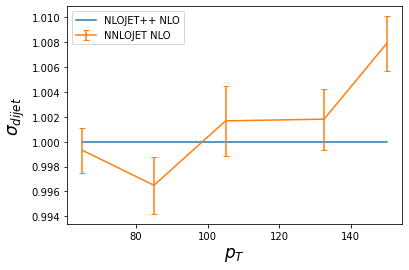

In [11]:
nlojet_ct14_norm = 1e+3*np.array([1.13204e+06, 267694, 83481, 42026, 15602] )
nnlojet_ct14_norm = np.array([[ 1.13125846407E+09, 2.07300834519E+06], 
                              [2.66755875873E+08, 6.16420699108E+05], 
                              [8.36210963612E+07, 2.33364867166E+05], 
                              [4.21021508415E+07, 1.02633557522E+05],
                              [1.57252839334E+07, 3.41562035376E+04]
                               ])
myx = [65, 85, 105, 132.5, 150]                           
plt.figure(figsize=(6,4))
plt.plot (myx, nlojet_ct14_norm/nlojet_ct14_norm, label="NLOJET++ NLO")
plt.errorbar(myx, nnlojet_ct14_norm[:, 0]/nlojet_ct14_norm, nnlojet_ct14_norm[:, 1]/nlojet_ct14_norm, label="NNLOJET NLO", capsize=3, markersize=3)
plt.xlabel("$p_T$", fontsize=17)
plt.ylabel (r"$\sigma_{dijet}$",  fontsize=17)
plt.legend()
plt.savefig("bench1.pdf", bbox_inches="tight")

703.4081637302838 8.275390161532751
136.536213926698 1.6063083991376235


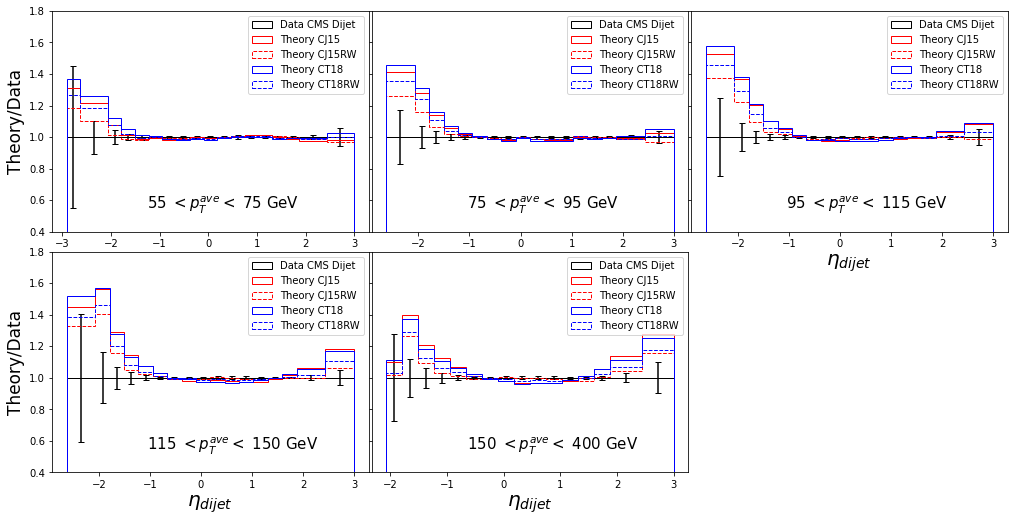

In [26]:
NNLOjet = ["./NLOdata2Faiq/data/CMS5020NLO.avgetaj12norm_ptavg1.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12norm_ptavg2.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12norm_ptavg3.dat", 
            "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12norm_ptavg4.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12norm_ptavg5.dat"]


fig, axs = plt.subplots(2,3, sharex=False, sharey= True, figsize=[14,7])
plt.tight_layout()
data = df_cteq
chi2_n =0
chi2_nn=0
for i in range(2) : 
    for j in range(3) : 
        k = j+3*i
        if (k==5) : 
            break
        df = data[k]
        lb = df["eta_lb"].to_numpy()
        ub = df["eta_ub"].to_numpy()
        dt = df["central"].to_numpy()
        err = np.sqrt(
             df["stat"].to_numpy()**2 +  df["syst"].to_numpy()**2
        )

        #theo_cteq =  df_cteq[k]["CTEQ"].to_numpy()
        #theo_ct14 =  df_ct14[k]["CT14"].to_numpy()
        theo_ct18 =  df_ct18[k]["CT18"].to_numpy()
        theo_cj15 =  df_CJ15[k]["CJ15"].to_numpy()
        theo_cj15rw =  df_CJ15RW[k]["CJ15RW"].to_numpy()
        theo_ct18rw =  df_ct18rw[k]["CT18rw"].to_numpy()
        #theo_nnlojet = np.loadtxt(NNLOjet[k])[:, 3]
        #theo_nnlojet_err = np.loadtxt(NNLOjet[k])[:, 4]

        #print(len(dt), len(theo_ct14), len(theo_nnlojet))
        denom = dt

        bins = lb
        binss = np.append(lb, ub[-1])
        middle = [(binss[k+1]+binss[k])/2 for k in range(len(binss)-1)] 
        binWidth = [(binss[i+1]-binss[i]) for i in range(len(binss)-1)]
        axs[i,j].hist(bins, binss, histtype='step', weights = dt/denom, color="black", label="Data CMS Dijet")
        axs[i, j].errorbar(middle, dt/denom, err/denom, color="black",  capsize=3, markersize=3, linestyle='None')

        #axs[i,j].hist(bins, binss, histtype='step', weights = theo_cteq, color="blue", label="Theory cteq")
       # axs[i,j].hist(bins, binss, histtype='step', weights = theo_ct14/denom, color="red", label="Theory NLOJET++ CT14")
        
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_cj15/denom, color="red", label="Theory CJ15")
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_cj15rw/denom, color="red", label="Theory CJ15RW", linestyle="dashed")
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_ct18/denom, color="blue", label="Theory CT18")
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_ct18rw/denom, color="blue", label="Theory CT18RW", linestyle="dashed")
        #axs[i,j].hist(bins, binss, histtype='step', weights = theo_ct18rw/denom, color="green", label="Theory CT18rw")
        #axs[i,j].hist(bins, binss, histtype='step', weights = the_cent, color="red", label="Theory-cent")
        #if k!=3 :
        #axs[i,j].hist(bins, binss, histtype='step', weights = theo_nnlojet/denom, color="green", label="Theory NNLOJET CT14")
        #axs[i, j].errorbar(middle,  theo_nnlojet/denom,  theo_nnlojet_err/denom, color="green",  capsize=3, markersize=3, linestyle='None')
        #axs[i,j].set_ylim([0.6, 1.3])
        #axs[i,j].axhline(1.0)
        axs[i,j].legend()
        #axs[i,j].set_yscale("log")
        plow = df["PT_lb"][0]
        phigh = df["PT_ub"][0]
        if(j==0) :
            axs[i,j].set_ylabel("Theory/Data", fontsize=17)

        if (i==1 or (i==0 and j==2)) : 
            axs[i,j].set_xlabel(r"$\eta_{dijet}$", fontsize=20)

        axs[i, j].annotate(str(plow)+" $<p_T^{ave}<$ "+ str(phigh)+ " GeV", xy=(0.3, 0.1), xycoords='axes fraction', fontsize=15)
        axs[i,j].set_ylim(0.4,1.8)
        chi2_n=chi2_n+ np.sum((dt-theo_cj15)**2/(err**2) )
        chi2_nn=chi2_nn+ np.sum((dt-theo_cj15rw)**2/(err**2) )

fig.delaxes(axs[1][2])
plt.subplots_adjust(wspace = 0.01, hspace=0.09)
print(chi2_n, chi2_n/85)
print(chi2_nn, chi2_nn/85)
plt.savefig("CT18RW-datatheo.pdf", bbox_inches="tight")

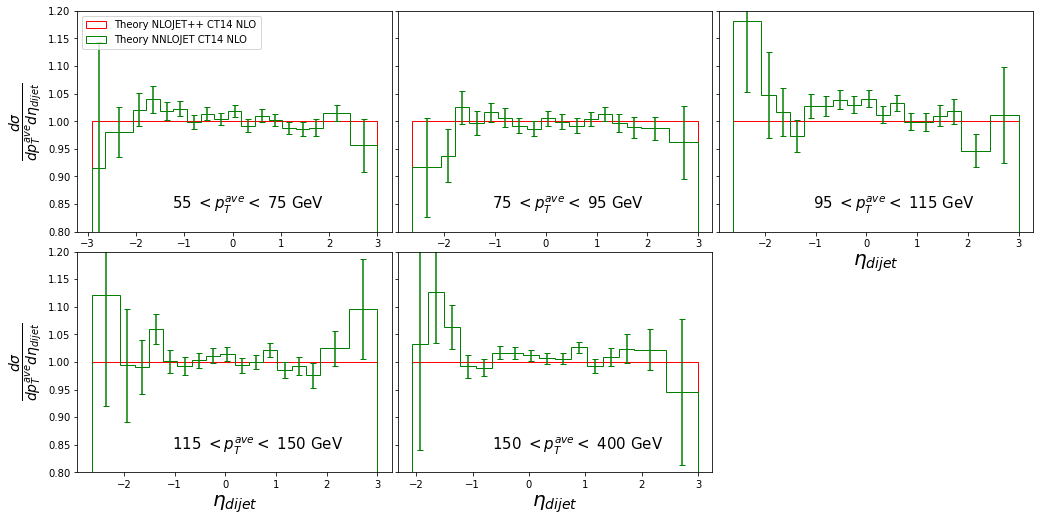

In [36]:
NNLOjet = ["./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg1.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg2.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg3.dat", 
            "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg4.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg5.dat"]

fig, axs = plt.subplots(2,3, sharex=False, sharey= True, figsize=[14,7])
plt.tight_layout()
data = df_cteq
chi2_n =0
chi2_nn=0
for i in range(2) : 
    for j in range(3) : 
        k = j+3*i
        if (k==5) : 
            break
        df = data[k]
        lb = df["eta_lb"].to_numpy()
        ub = df["eta_ub"].to_numpy()
        dt = df["central"].to_numpy()
        err = np.sqrt(
             df["stat"].to_numpy()**2 +  df["syst"].to_numpy()**2
        )
        theo_ct14 =  df_ct14_unnorm[k]["CT14unnorm"].to_numpy()
        theo_nnlojet = np.loadtxt(NNLOjet[k])[:, 3]
        theo_nnlojet_err = np.loadtxt(NNLOjet[k])[:, 4]

        #print(len(dt), len(theo_ct14), len(theo_nnlojet))
        denom = theo_ct14

        bins = lb
        binss = np.append(lb, ub[-1])
        middle = [(binss[k+1]+binss[k])/2 for k in range(len(binss)-1)] 
        binWidth = [(binss[i+1]-binss[i]) for i in range(len(binss)-1)]
        #axs[i,j].hist(bins, binss, histtype='step', weights = dt/denom, color="black", label="data")
        axs[i, j].errorbar(middle, dt/denom, err/denom, color="black",  capsize=3, markersize=3, linestyle='None')
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_ct14/denom, color="red", label="Theory NLOJET++ CT14 NLO")
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_nnlojet/denom, color="green", linestyle="-", label="Theory NNLOJET CT14 NLO")
        axs[i, j].errorbar(middle,  theo_nnlojet/denom,  theo_nnlojet_err/denom, color="green",  capsize=3, markersize=3, linestyle='None')
        #axs[i,j].set_ylim([0.6, 1.3])
        #axs[i,j].axhline(1.0)
        if (k==0) :
            axs[i,j].legend(loc="upper left")
        plow = df["PT_lb"][0]
        phigh = df["PT_ub"][0]
        if(j==0) :
            axs[i,j].set_ylabel(r"$\frac{d\sigma}{dp_T^{ave} d\eta_{dijet}}$", fontsize=20)

        if (i==1 or (i==0 and j==2)) : 
            axs[i,j].set_xlabel(r"$\eta_{dijet}$", fontsize=20)

        axs[i, j].annotate(str(plow)+" $<p_T^{ave}<$ "+ str(phigh)+ " GeV", xy=(0.3, 0.1), xycoords='axes fraction', fontsize=15)
        axs[i,j].set_ylim(0.8,1.2)


fig.delaxes(axs[1][2])
plt.subplots_adjust(hspace=0.09, wspace = 0.02)
plt.savefig("sigunnorm.pdf", bbox_inches="tight")


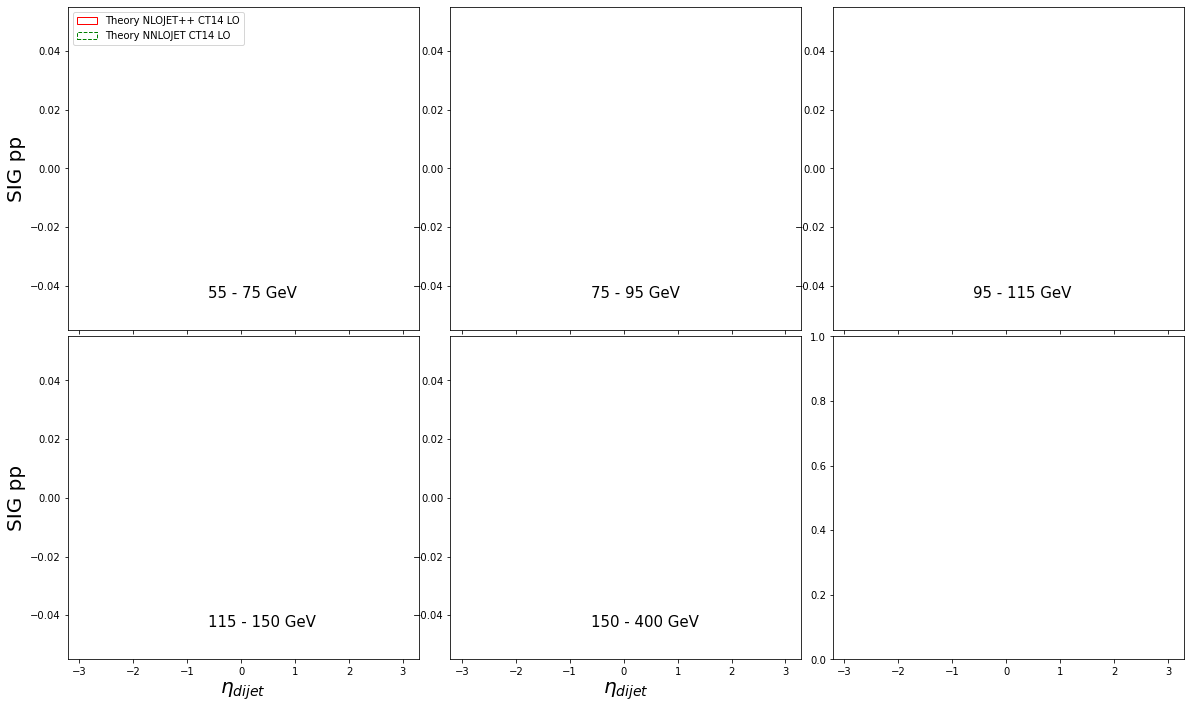

In [34]:
NNLOjet = ["./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg1.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg2.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg3.dat", 
            "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg4.dat", "./NLOdata2Faiq/data/CMS5020NLO.avgetaj12_ptavg5.dat"]

#NNLOjet = ["./NLOdata2Faiq/data/CMS5020LO.avgetaj12_ptavg1.dat", "./NLOdata2Faiq/data/CMS5020LO.avgetaj12_ptavg2.dat", "./NLOdata2Faiq/data/CMS5020LO.avgetaj12_ptavg3.dat", 
#            "./NLOdata2Faiq/data/CMS5020LO.avgetaj12_ptavg4.dat", "./NLOdata2Faiq/data/CMS5020LO.avgetaj12_ptavg5.dat"]


fig, axs = plt.subplots(2,3, sharex=True, sharey= False, figsize=[20,12])
data = df_cteq
chi2_n =0
chi2_nn=0
for i in range(2) : 
    for j in range(3) : 
        k = j+3*i
        if (k==5) : 
            break
        df = data[k]
        lb = df["eta_lb"].to_numpy()
        ub = df["eta_ub"].to_numpy()
        dt = df["central"].to_numpy()
        err = np.sqrt(
             df["stat"].to_numpy()**2 +  df["syst"].to_numpy()**2
        )

        #theo_cteq =  df_cteq[k]["CTEQ"].to_numpy()
        #theo_ct14 =  df_ct14_unnorm[k]["CT14unnorm"].to_numpy()
        theo_ct14 =  df_ct14_unnorm_lo[k]["CT14unnormlo"].to_numpy()
        #theo_ct18 =  df_ct18[k]["CT18"].to_numpy()
        #theo_ct18rw =  df_ct18rw[k]["CT18rw"].to_numpy()
        theo_nnlojet = np.loadtxt(NNLOjet[k])[:, 3]

        #print(len(dt), len(theo_ct14), len(theo_nnlojet))
        denom = theo_ct14

        bins = lb
        binss = np.append(lb, ub[-1])
        middle = [(binss[k+1]+binss[k])/2 for k in range(len(binss)-1)] 
        binWidth = [(binss[i+1]-binss[i]) for i in range(len(binss)-1)]
        #axs[i,j].hist(bins, binss, histtype='step', weights = dt/denom, color="black", label="data")
        #axs[i, j].errorbar(middle, dt/denom, err/denom, color="black",  capsize=3, markersize=3, linestyle='None')
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_ct14/denom, color="red", label="Theory NLOJET++ CT14 LO")
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_nnlojet/denom, color="green", linestyle="dashed", label="Theory NNLOJET CT14 LO")
        #axs[i,j].set_ylim([0.6, 1.3])
        #axs[i,j].axhline(1.0)
        if (k==0) :
            axs[i,j].legend(loc="upper left")
        plow = df["PT_lb"][0]
        phigh = df["PT_ub"][0]
        if(j==0) :
            axs[i,j].set_ylabel("SIG pp", fontsize=20)

        if (i==1) : 
            axs[i,j].set_xlabel(r"$\eta_{dijet}$", fontsize=20)

        axs[i, j].annotate(str(plow)+" - "+ str(phigh)+ " GeV", xy=(0.4, 0.1), xycoords='axes fraction', fontsize=15)
        #axs[i,j].set_ylim(0.98,1.02)



plt.subplots_adjust(hspace=0.02, wspace = 0.09)
plt.savefig("sigunnorm.pdf", bbox_inches="tight")


LHAPDF 6.5.1 loading all 57 PDFs in set CT14nlo_1_1
CT14nlo_1_1, version 1; 57 PDF members
LHAPDF 6.5.1 loading all 1 PDFs in set CT14-CMSdijet5TeV_1_1
CT14-CMSdijet5TeV_1_1, version 1; 1 PDF members
LHAPDF 6.5.1 loading all 59 PDFs in set CT18NLO_1_1
CT18NLO_1_1, version 1; 59 PDF members
LHAPDF 6.5.1 loading all 1 PDFs in set CT18-CMSdijet5TeV_1_1
CT18-CMSdijet5TeV_1_1, version 1; 1 PDF members
LHAPDF 6.5.1 loading all 49 PDFs in set CJ15nlo_1_1
CJ15nlo_1_1, version 2; 49 PDF members
LHAPDF 6.5.1 loading all 1 PDFs in set CJ15-CMSdijet_1_1
CJ15-CMSdijet_1_1, version 1; 1 PDF members


posx and posy should be finite values


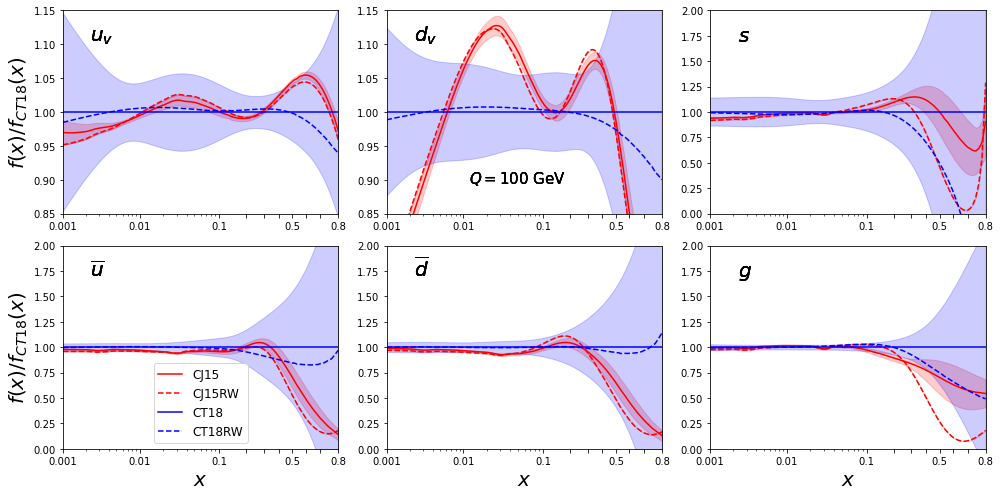

In [3]:
A=1
Z=1
CT14 = PDFs("CT14nlo_"+str(A)+"_"+str(Z), "sym", A, Z, True)
CT14rw = PDFs("CT14-CMSdijet5TeV_"+str(A)+"_"+str(Z), "sym", A, Z, True)
CT18 = PDFs("CT18NLO_"+str(A)+"_"+str(Z), "sym", A, Z, True)
CT18rw = PDFs("CT18-CMSdijet5TeV_"+str(A)+"_"+str(Z), "sym", A, Z, True)
cj15 = PDFs("CJ15nlo_"+str(A)+"_"+str(Z), "sym", A, Z, True)
cj15_rw = PDFs("CJ15-CMSdijet_"+str(A)+"_"+str(Z), "sym", A, Z, True)
mypdfs = [ 
           #[CT14, "red", "-", "CT14",  False, 0.2], 
           #[CT14rw, "blue", "-", "CT14RW",  False, 0.2],
           [cj15, "red", "-", "CJ15",  True, 0.2],
           [cj15_rw, "red", "dashed", "CJ15RW",  True, 0.2],
           [CT18, "blue", "-", "CT18", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [CT18rw, "blue", "dashed", "CT18RW",  False, 0.2], 
]

flavors = ["uv", "dv", "s", "ubar", "dbar", "g"]
Q = 100 #np.sqrt(4)
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.8),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    #plt.axhline(1.0, linestyle="dotted")
    #plt.axhline(0.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        denom, dpd, dmd = CT18.getPDFerrors(xlist, Q, flv)
        plt.plot(xlist, (data/denom), color=pdf[1], linestyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)/denom), ((data-dp)/denom), color=pdf[1], alpha=pdf[5])

        flvlabel = "$"+flv+"$"
        if (flv == "uv") : 
            flvlabel = "$u_v$"
        elif (flv =="dv") : 
            flvlabel= "$d_v$"
        elif flv=="ubar" : 
            flvlabel = r"$\overline{u}$"
        elif flv=="dbar" : 
            flvlabel = r"$\overline{d}$"


        plt.xscale("logit" ,one_half="0.5")
        if int(iflv/3)==1 : 
            plt.xlabel(r'${x}$',fontsize=20)
        if (iflv%3 ==0) : 
            plt.ylabel(r'$f(x)/f_{CT18}(x)$',fontsize=20, rotation=90)
        plt.annotate(flvlabel, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
    
        
        
        if (flv=="s") : 
            plt.ylim(0., 2)
        elif (flv=="g"):
            plt.ylim(0., 2)
        elif (flv=="uv" or flv=="dv") : 
            plt.ylim(0.85, 1.15)
        else : 
            plt.ylim(0.0, 2.0)

        if (flv=="ubar"):
            plt.legend(loc="lower center", fontsize=12)
        if (iflv == 1) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        plt.xscale("logit" ,one_half="0.5")
        ax.set_xticks([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
        ax.set_xticklabels(["0.001", "0.01", "0.1","", "", "", "0.5","", "", "0.8","0.9", "0.95"])
        ax.xaxis.set_minor_formatter(NullFormatter())
        plt.xlim(0.0, 0.8)
        
plt.savefig("CT18RW.pdf", bbox_inches="tight")

In [ ]:
K

18 18
17 17
17 17
17 17
16 16


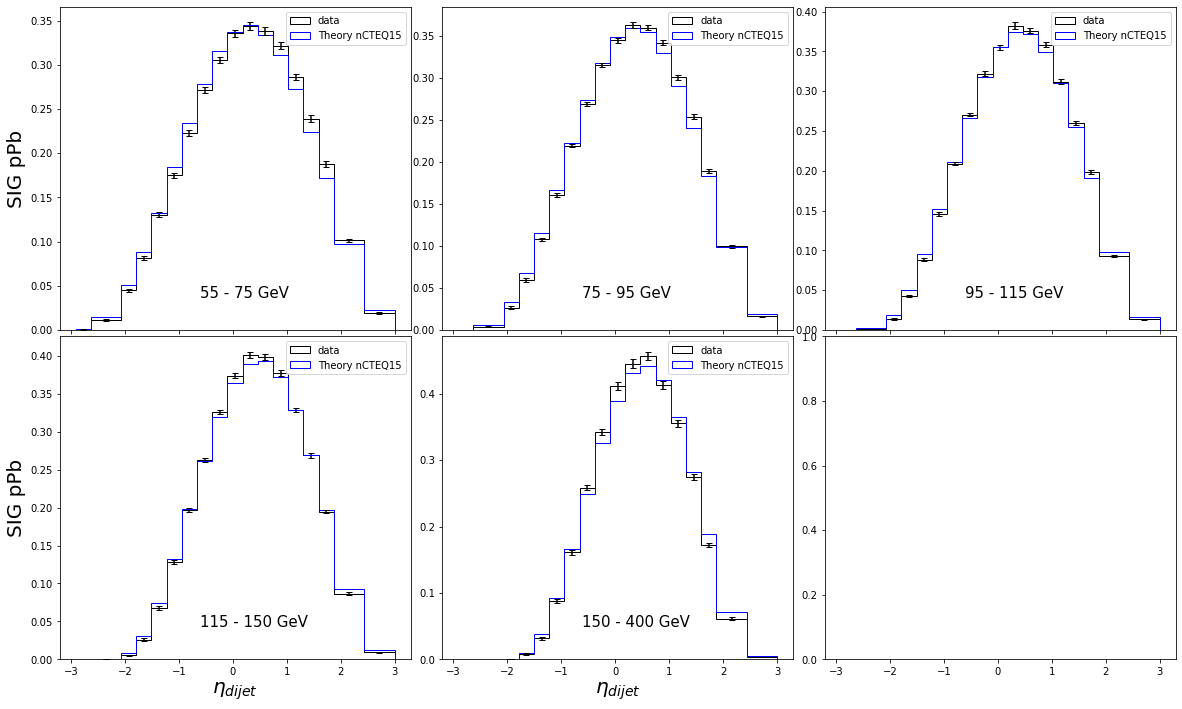

In [7]:
fig, axs = plt.subplots(2,3, sharex=True, sharey= False, figsize=[20,12])
data = df_ppb
for i in range(2) : 
    for j in range(3) : 
        k = j+3*i
        if (k==5) : 
            break
        df = data[k]
        lb = df["eta_lb"].to_numpy()
        ub = df["eta_ub"].to_numpy()
        dt = df["central"].to_numpy()
        err = np.sqrt(
             df["stat"].to_numpy()**2 +  df["syst"].to_numpy()**2
        )

        theo_cteq =  df["theory_cteq"].to_numpy()

        print(len(dt), len(theo_cteq))

        if (i==1 and j==2) :
            continue
        bins = lb
        binss = np.append(lb, ub[-1])
        middle = [(binss[k+1]+binss[k])/2 for k in range(len(binss)-1)] 
        binWidth = [(binss[i+1]-binss[i]) for i in range(len(binss)-1)]
        axs[i,j].hist(bins, binss, histtype='step', weights = dt, color="black", label="data")
        axs[i, j].errorbar(middle, dt, err, color="black",  capsize=3, markersize=3, linestyle='None')

        axs[i,j].hist(bins, binss, histtype='step', weights = theo_cteq, color="blue", label="Theory nCTEQ15")
        #axs[i,j].set_ylim([0.6, 1.3])
        #axs[i,j].axhline(1.0)
        axs[i,j].legend()

        plow = df["PT_lb"][0]
        phigh = df["PT_ub"][0]
        if(j==0) :
            axs[i,j].set_ylabel("SIG pPb", fontsize=20)

        if (i==1) : 
            axs[i,j].set_xlabel(r"$\eta_{dijet}$", fontsize=20)

        axs[i, j].annotate(str(plow)+" - "+ str(phigh)+ " GeV", xy=(0.4, 0.1), xycoords='axes fraction', fontsize=15)

plt.subplots_adjust(hspace=0.02, wspace = 0.09)

NameError: name 'df_pp' is not defined

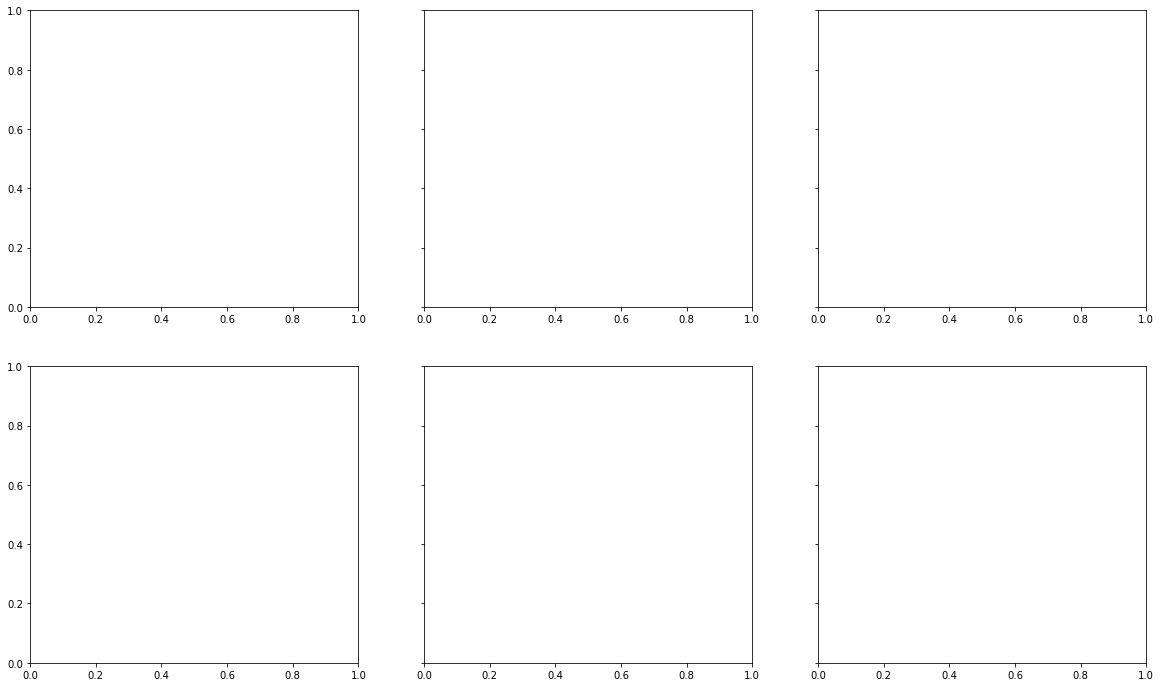

In [8]:
fig, axs = plt.subplots(2,3, sharex=False, sharey= True, figsize=[20,12])
data = df_pp
data2 = df_ppb 
data3 = df_RSIG
for i in range(2) : 
    for j in range(3) : 
        k = j+3*i
        if (k==5) : 
            break
        df = data[k]
        df2 = data2[k]
        df3 = data3[k]

        plow = df["PT_lb"][0]
        phigh = df["PT_ub"][0]

        lb = df["eta_lb"].to_numpy()
        ub = df["eta_ub"].to_numpy()
        bins = lb
        binss = np.append(lb, ub[-1])

        theo_ncteq_cteq =  df2["theory_cteq"].to_numpy()/df["CTEQ"].to_numpy()
        theo_ncteq_ct18 =  df2["theory_cteq"].to_numpy()/df["CT18"].to_numpy()

        axs[i,j].hist(bins, binss, histtype='step', weights = theo_ncteq_cteq, color="blue", label="Theory nCTEQ/CTEQ")
        axs[i,j].hist(bins, binss, histtype='step', weights = theo_ncteq_ct18, color="green", label="Theory nCTEQ/CT18")


        lb3 = df3["eta_lb"].to_numpy()
        ub3 = df3["eta_ub"].to_numpy()
        dt3 = df3["central"].to_numpy()
        err3 = np.sqrt(
             df3["stat"].to_numpy()**2 +  df3["syst"].to_numpy()**2
        )

        print(len(dt3), len(theo_ncteq_ct18))
        bins3 = lb3
        binss3 = np.append(lb3, ub3[-1])
        middle3 = [(binss3[k+1]+binss3[k])/2 for k in range(len(binss3)-1)] 
        binWidth3 = [(binss3[i+1]-binss3[i]) for i in range(len(binss3)-1)]

        axs[i,j].hist(bins3, binss3, histtype='step', weights = dt3, color="black", label="data")
        axs[i, j].errorbar(middle3, dt3, err3, color="black",  capsize=3, markersize=3, linestyle='None')
        #axs[i,j].hist(bins3, binss3, histtype='step', weights = df3["theory_cteq"].to_numpy(), color="cyan", label="Theory nCTEQ/CTEQ")

        axs[i, j].annotate(str(plow)+" - "+ str(phigh)+ " GeV", xy=(0.3, 0.1), xycoords='axes fraction', fontsize=15)

        axs[i,j].set_ylim([0.6, 1.3])
        axs[i,j].axhline(1.0)
        axs[i,j].legend()
        if(j==0) :
            axs[i,j].set_ylabel("RSIG pPb/pp", fontsize=20)

        if (i==1) : 
            axs[i,j].set_xlabel(r"$\eta_{dijet}$", fontsize=20)

        if (k==0) : 
            axs[i,j].set_xlim([-2.914, 2.99])
        elif k==1 or k==2 : 
            axs[i,j].set_xlim([-2.632, 2.99])
        else : 
            axs[i,j].set_xlim([-2.06, 2.99])

plt.subplots_adjust(hspace=0.08, wspace = 0.01)

18 18
17 17
17 17
16 16
16 16
nCTEQ15/CTEQ6 :   547.0903650352234 6.512980536133612
nCTEQ15/CT18 :   355.60885227303163 4.233438717536091


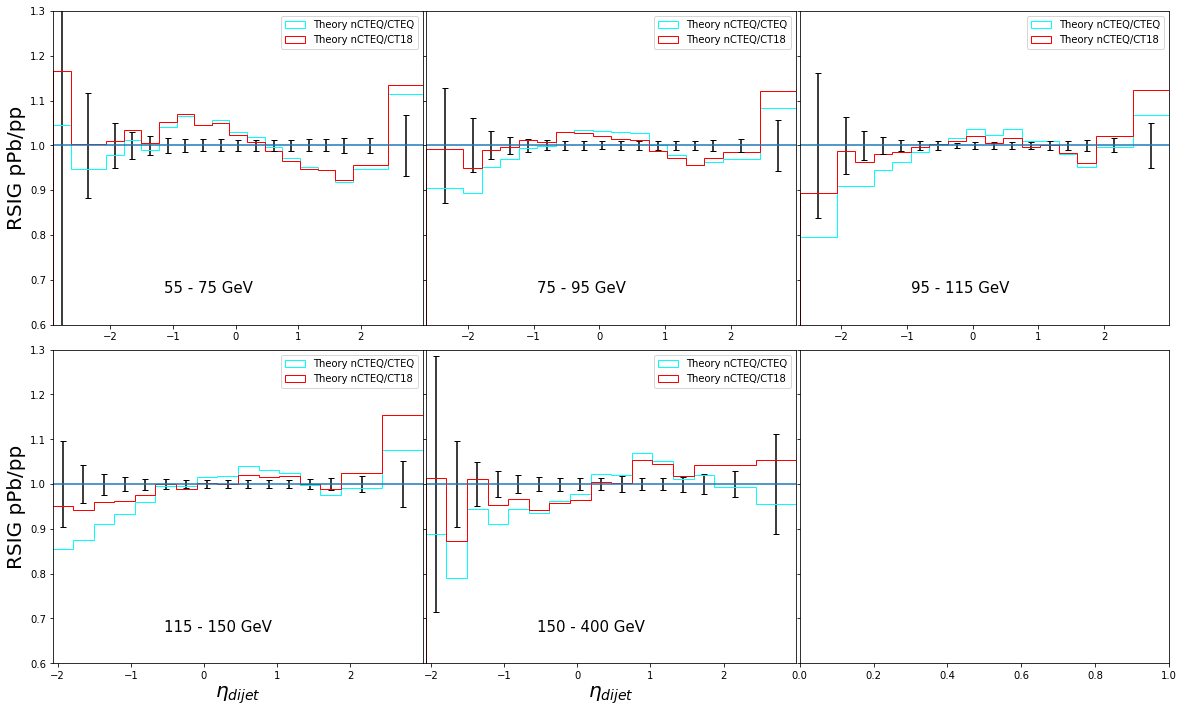

In [ ]:
fig, axs = plt.subplots(2,3, sharex=False, sharey= True, figsize=[20,12])
data = df_pp
data2 = df_ppb 
data3 = df_RSIG

chi2_cteq=0
chi2_ct18 =0
for i in range(2) : 
    for j in range(3) : 
        k = j+3*i
        if (k==5) : 
            break
        df = data[k]
        df2 = data2[k]
        df3 = data3[k]

        plow = df["PT_lb"][0]
        phigh = df["PT_ub"][0]

        theo_ncteq_ct18 =  df2["theory_cteq"].to_numpy()/df["CT18"].to_numpy()

        if (k==3) : 
            theo_ncteq_ct18 = np.delete(theo_ncteq_ct18, 0)

        lb3 = df3["eta_lb"].to_numpy()
        ub3 = df3["eta_ub"].to_numpy()
        dt3 = df3["central"].to_numpy()
        err3 = np.sqrt(
             df3["stat"].to_numpy()**2 +  df3["syst"].to_numpy()**2
        )
        bins3 = lb3
        binss3 = np.append(lb3, ub3[-1])
        middle3 = [(binss3[k+1]+binss3[k])/2 for k in range(len(binss3)-1)] 
        binWidth3 = [(binss3[i+1]-binss3[i]) for i in range(len(binss3)-1)]

        print(len(dt3), len(theo_ncteq_ct18))

        axs[i, j].errorbar(middle3, dt3/dt3, err3/dt3, color="black",  capsize=3, markersize=3, linestyle='None')
        axs[i,j].hist(bins3, binss3, histtype='step', weights = df3["theory_cteq"].to_numpy()/dt3, color="cyan", label="Theory nCTEQ/CTEQ")
        axs[i,j].hist(bins3, binss3, histtype='step', weights = theo_ncteq_ct18/dt3, color="red", label="Theory nCTEQ/CT18")

        axs[i, j].annotate(str(plow)+" - "+ str(phigh)+ " GeV", xy=(0.3, 0.1), xycoords='axes fraction', fontsize=15)

        axs[i,j].set_ylim([0.6, 1.3])
        axs[i,j].axhline(1.0)
        axs[i,j].legend()
        if(j==0) :
            axs[i,j].set_ylabel("RSIG pPb/pp", fontsize=20)

        if (i==1) : 
            axs[i,j].set_xlabel(r"$\eta_{dijet}$", fontsize=20)

        if (k==0) : 
            axs[i,j].set_xlim([-2.914, 2.99])
        elif k==1 or k==2 : 
            axs[i,j].set_xlim([-2.632, 2.99])
        else : 
            axs[i,j].set_xlim([-2.06, 2.99])

        chi2_cteq=chi2_cteq+ np.sum((dt3-df3["theory_cteq"].to_numpy())**2/(err3**2) )
        chi2_ct18=chi2_ct18+ np.sum((dt3-theo_ncteq_ct18)**2/(err3**2) )
plt.subplots_adjust(hspace=0.08, wspace = 0.01)

print("nCTEQ15/CTEQ6 :  ",  chi2_cteq, chi2_cteq/84 )
print("nCTEQ15/CT18 :  ",  chi2_ct18, chi2_ct18/84 )

In [ ]:
pp chi2/N : 
CT14 : 7.22   #7.5
NNPDF31 : 4.17  #4.0
MMHT  : 4.73    #4.7
ABMP16 : 3.52    #2.7
CJ15 : 8.28

MSHT20 : 6.10
NNPDF40 : 10.73
CT18  : 8.81  
CTEQ : 18.87

In [ ]:
ppb chi2/N : 
EPPS16-CT14 : 6.75  #6.9
nCTEQ15-CTEQ6 : 7.37



In [ ]:
pPb/pp chi2/N : 
EPPS16-CT14 : 1.68  #1.7
nCTEQ15-CTEQ6 : 6.16
nCTEQ15-CT18 : 4.23